In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv('AviationData.csv', header=0, encoding='cp1252',dtype=str) #'cp1252' encoding becuase of some ascii values 

# Column editing

In [107]:
df.columns = df.columns.str.replace('.', ' ') # Change '.' in column names to ' '
df.columns = df.columns.str.title() # Change to title case
df.rename(columns={'Far Description': 'FAR Description', 'Event Id': 'Event ID'}, inplace = True) # Deal with the exceptions (ID, FAR)
pd.set_option('display.max_columns', 100) # Set max display width to 100
df.head() 


,Event ID,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number Of Engines,Engine Type,FAR Description,Schedule,Purpose Of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Report Status,Publication Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1,Reciprocating,NaN,NaN,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1,Reciprocating,NaN,NaN,Personal,NaN,3,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1,2,NaN,0,VMC,Approach,Probable Cause,16-04-1980


In [108]:
#df.isnull().sum().sort_values(ascending = False) # Ranked missing data

# Broad dataframe filters
### Items that we will not need

In [109]:
cols_to_drop = ['Schedule','FAR Description','Airport Code',
                'Airport Name','Publication Date','Air Carrier','Registration Number',
                'Investigation Type']

df = df.drop(cols_to_drop, axis = 1) # Columns we don't need

In [110]:
df = df[df['Amateur Built'] == "No"] # Remove any amateur built aircraft

In [111]:
df = df.drop(['Amateur Built'], axis = 1) # Don't need it anymore

In [112]:
df.dropna(subset = ["Aircraft Category"],axis = 0, inplace = True ) # Remove any NaN aircraft categories

In [113]:
#df.dropna(subset = ["Make"],axis = 0, inplace = True ) # Remove any NaN Makes

In [114]:
df = df[df['Aircraft Category'] == "Airplane"] # Remove anything that's not an airplane

In [115]:
df['Make'] = df['Make'].str.title() # CESSNA --> Cessna

In [116]:
df = df[df['Event Date'].str[:4] != "1982"] # Lots of values here at the very start

In [117]:
df["Injury Severity"] = df["Injury Severity"].str.split('(').str[0] # Makes all fatal columns "Fatal"

df.to_csv("Aviation_data_clean.csv", index=False) 

# Specific dataframes
### Filtered dataframes with specific keys

In [118]:
skydiving_df = df[df["Purpose Of Flight"] == "Skydiving"] # All skydiving crashes

US_crashes_df = df[df["Country"] =="United States"] # All crashes in the US

US_sky_crashes_df = US_crashes_df[US_crashes_df["Purpose Of Flight"] == "Skydiving"] # All skydiving crashes in the US

state_sky_crashes_df = US_sky_crashes_df["Location"].str.split(",").str.get(1).value_counts()# All skydiving crashes in each US state

engine_df = df.dropna(subset = ["Engine Type","Number Of Engines"],axis = 0) # Engine types, and # engines with no NaN

twin_engine_df = engine_df[engine_df["Number Of Engines"] == "2"] # All twin engine crashes
twin_engine_df["Make"].value_counts()

purpose_df = df.dropna(subset = ["Purpose Of Flight"],axis =0) # Non-NaN purpose of flight

injury_df = df.dropna(subset = ["Injury Severity"],axis = 0) # Non-NaN injury dataframe

# Plots

In [119]:
"""
make_skydiving = {}

for index,item in US_sky_crashes_df.iterrows(): # Dict of all makes involved in US skydiving crashes
    if item["Make"] in make_skydiving:
        make_skydiving[item["Make"]] += 1
    else:
        make_skydiving[item["Make"]] = 1
        
make_skydiving = dict(sorted(make_skydiving.items(), key=lambda item: item[1], reverse = True)) # Sort

plt.bar(make_skydiving.keys(),make_skydiving.values())
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel("Aircraft Make")
plt.ylabel("Number of Crashes")
plt.title("Make vs. US Skydiving Crashes")
"""

'\nmake_skydiving = {}\n\nfor index,item in US_sky_crashes_df.iterrows(): # Dict of all makes involved in US skydiving crashes\n    if item["Make"] in make_skydiving:\n        make_skydiving[item["Make"]] += 1\n    else:\n        make_skydiving[item["Make"]] = 1\n        \nmake_skydiving = dict(sorted(make_skydiving.items(), key=lambda item: item[1], reverse = True)) # Sort\n\nplt.bar(make_skydiving.keys(),make_skydiving.values())\nplt.tick_params(axis=\'x\', labelrotation=90)\nplt.xlabel("Aircraft Make")\nplt.ylabel("Number of Crashes")\nplt.title("Make vs. US Skydiving Crashes")\n'

In [120]:
"""
make_counts = US_sky_crashes_df["Model"].value_counts()
plt.xlabel("Aircraft Model")
plt.ylabel("Number of Crashes")
plt.title("Model vs. US Skydiving Crashes")
plt.tick_params(axis='x', labelrotation=90)
plt.bar(make_counts.index[:20],make_counts.values[:20])
"""

'\nmake_counts = US_sky_crashes_df["Model"].value_counts()\nplt.xlabel("Aircraft Model")\nplt.ylabel("Number of Crashes")\nplt.title("Model vs. US Skydiving Crashes")\nplt.tick_params(axis=\'x\', labelrotation=90)\nplt.bar(make_counts.index[:20],make_counts.values[:20])\n'

Skydiving related crashes have not climbed significantly


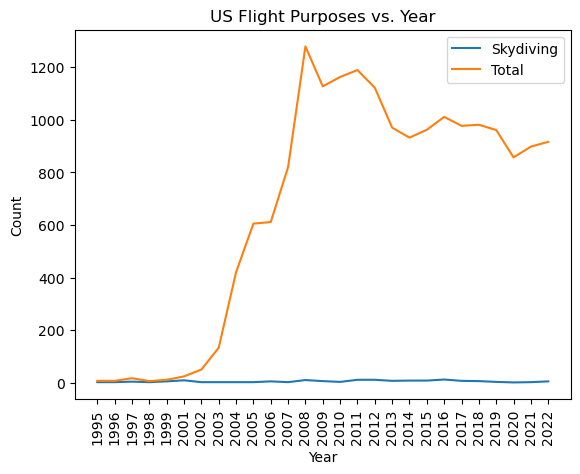

In [121]:
years = US_sky_crashes_df["Event Date"].str.split("-").str.get(0).value_counts() 
years_total = US_crashes_df["Event Date"].str.split("-").str.get(0).value_counts() 
plt.tick_params(axis='x', labelrotation=90)
years = years.sort_index()[10:]
years_total = years_total.sort_index()[10:]
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("US Flight Purposes vs. Year")

years_sky_and_total = pd.merge(years, years_total, on='Event Date', how='inner')

plt.plot(years_sky_and_total["count_x"].index[1:],years_sky_and_total["count_x"].values[1:], label = "Skydiving")
plt.plot(years_sky_and_total["count_y"].index[1:],years_sky_and_total["count_y"].values[1:], label = "Total")
plt.legend()
print("Skydiving related crashes have not climbed significantly")

Twin engines have 3.88x fewer crashes


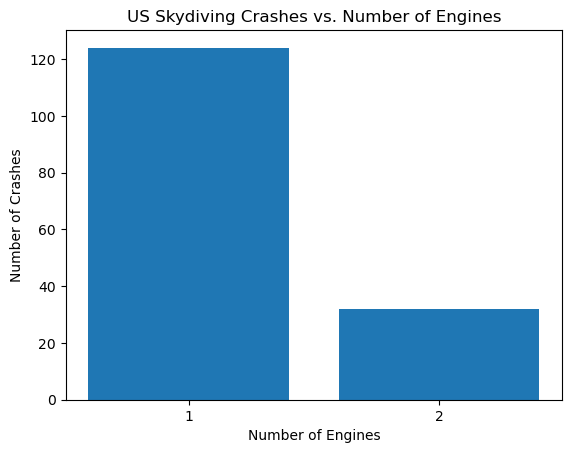

In [122]:
number_of_engines = US_sky_crashes_df["Number Of Engines"].value_counts()
plt.xlabel("Number of Engines")
plt.ylabel("Number of Crashes")
plt.title("US Skydiving Crashes vs. Number of Engines")
plt.bar(number_of_engines.index,number_of_engines.values)
ratio = str(round(number_of_engines.values[0]/number_of_engines.values[1],2))
print("Twin engines have "+ratio+"x fewer crashes")

In [123]:
#make_counts = df["Make"].value_counts()
#plt.xlabel("Aircraft Make")
#plt.ylabel("Number of Crashes")
#plt.title("Make vs. All Crashes")
#plt.tick_params(axis='x', labelrotation=90)
#plt.bar(make_counts.index[:10],make_counts.values[:10])

Country
United States    16941
Name: count, dtype: int64


C:\Users\Greg\AppData\Local\Temp\ipykernel_37648\2095471750.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purpose_values["Event Date"] = purpose_values['Event Date'].apply(lambda x: x.split('-')[0])
C:\Users\Greg\AppData\Local\Temp\ipykernel_37648\2095471750.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purpose_values["Event Date"] = purpose_values['Event Date'][100:]


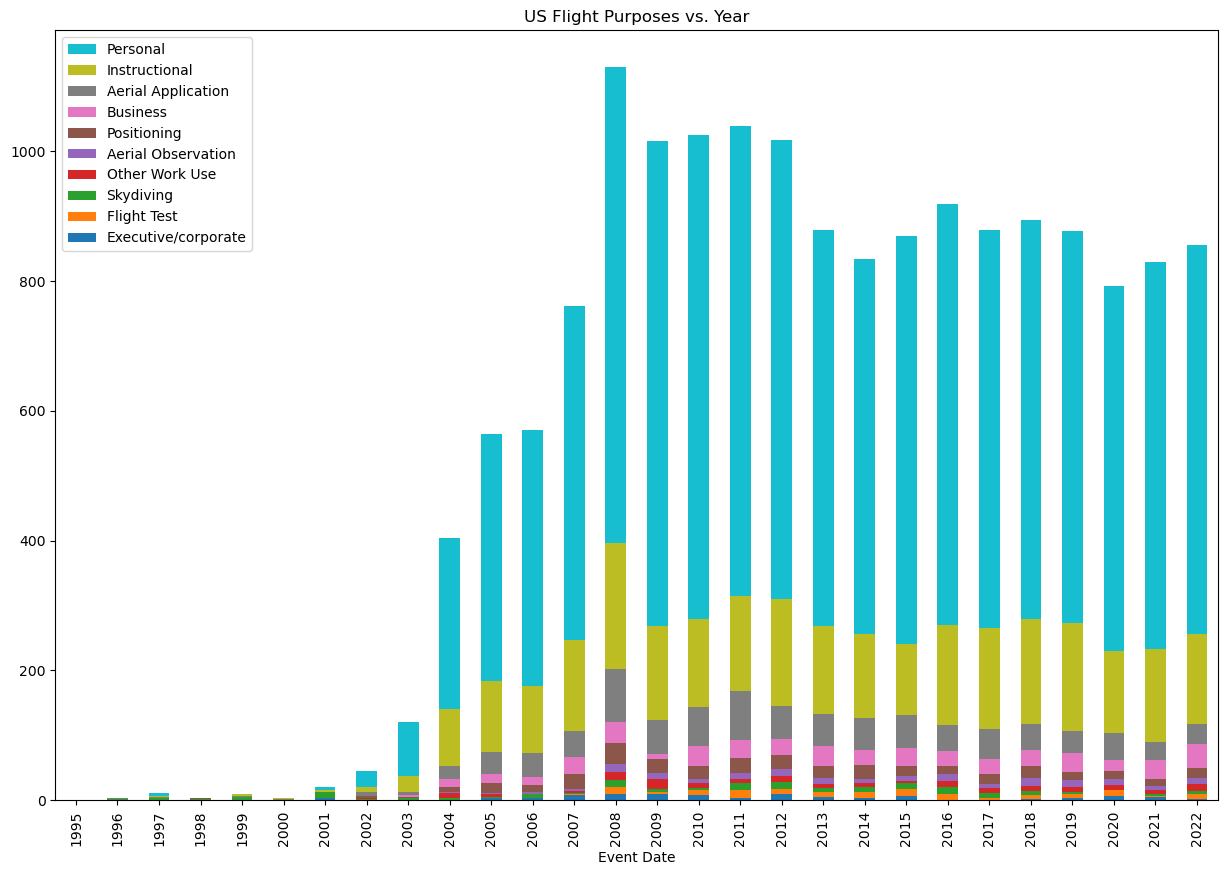

In [124]:
# Make sure the main dataframe is named df
purpose_df = df.dropna(subset = ["Purpose Of Flight"],axis =0) # Dataframe with no NaN purpose of flight
purpose_df = purpose_df[purpose_df["Country"] == "United States"]
print(purpose_df["Country"].value_counts())
purpose_values = purpose_df[["Purpose Of Flight","Event Date"]]
#purpose_values = purpose_values[purpose_values['Purpose Of Flight'] == "Skydiving"]

purpose_values["Event Date"] = purpose_values['Event Date'].apply(lambda x: x.split('-')[0])
purpose_values["Event Date"] = purpose_values['Event Date'][100:]
flights_per_year = purpose_values.groupby(['Event Date', 'Purpose Of Flight']).size().unstack(fill_value=0)
flights_per_year_list = []
for item in flights_per_year:
    flights_per_year_list.append((item,flights_per_year[item].sum()))
    
flights_per_year_list = sorted(flights_per_year_list, key=lambda x: x[1], reverse = True)
top_10_list = [item[0] for item in flights_per_year_list[:10]]
flights_per_year_top_10 = flights_per_year.drop(columns=[col for col in flights_per_year.columns if col not in top_10_list])
flights_per_year_top_10 = flights_per_year_top_10[flights_per_year_top_10.sum().sort_values().index] # Makes the stacked bars sorted
ax = flights_per_year_top_10.plot(kind='bar', stacked=True, figsize=(15, 10), title="US Flight Purposes vs. Year")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])
plt.show()

In [125]:
sky_injury_df = injury_df.dropna(subset = ["Injury Severity"], axis = 0)
sky_injury_df = sky_injury_df[sky_injury_df["Purpose Of Flight"] == "Skydiving"]
sky_injury_df["Injury Severity"] = sky_injury_df["Injury Severity"].str.split('(').str[0] # Makes all fatal columns "Fatal"
totals = sky_injury_df["Injury Severity"].value_counts()
total_fatal = int(totals[1])
percentage = total_fatal / sum(totals) * 100
percentage = round(percentage,2)
print("All skydiving crashes are "+str(percentage)+"% Fatal")

All skydiving crashes are 32.32% Fatal


C:\Users\Greg\AppData\Local\Temp\ipykernel_37648\1346601475.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_fatal = int(totals[1])


Skydiving crashes are 32.3% Fatal
All other crashes are 18.96% Fatal


C:\Users\Greg\AppData\Local\Temp\ipykernel_37648\3497284651.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_fatal = int(totals[1])
C:\Users\Greg\AppData\Local\Temp\ipykernel_37648\3497284651.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_fatal = int(totals[1])


Text(0, 0.5, 'Fatality Rate (%)')

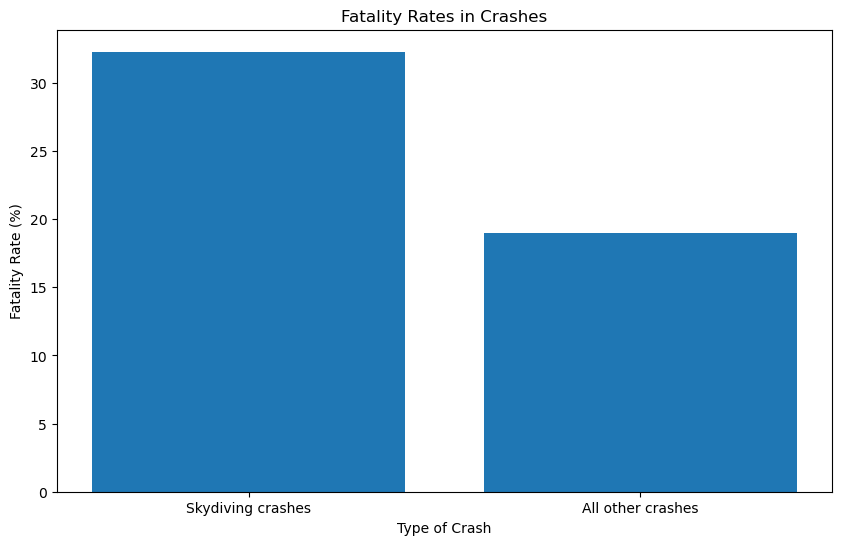

In [126]:
sky_injury_twin_df = injury_df.dropna(subset = ["Injury Severity"], axis = 0)
sky_injury_twin_df = sky_injury_twin_df.dropna(subset = ["Number Of Engines"], axis = 0)
sky_injury_twin_df = sky_injury_twin_df[sky_injury_twin_df["Purpose Of Flight"] == "Skydiving"]
totals = sky_injury_twin_df["Injury Severity"].value_counts()
total_fatal = int(totals[1])
percentage = total_fatal / sum(totals) * 100
percentage_sky_injury = round(percentage,2)
print("Skydiving crashes are "+str(percentage_sky_injury)+"% Fatal")

all_injury_df = injury_df.dropna(subset = ["Injury Severity"], axis = 0)
all_injury_df = injury_df[injury_df["Injury Severity"] != "Unavailable"]
all_injury_df = all_injury_df[all_injury_df["Purpose Of Flight"] != "Skydiving"]
totals = all_injury_df["Injury Severity"].value_counts()
total_fatal = int(totals[1])
percentage = total_fatal / sum(totals) * 100
percentage = round(percentage,2)
print("All other crashes are "+str(percentage)+"% Fatal")

categories = ['Skydiving crashes', 'All other crashes']
percentages = [percentage_sky_injury, percentage]

plt.figure(figsize=(10, 6))
plt.bar(categories, percentages)

plt.title('Fatality Rates in Crashes')
plt.xlabel('Type of Crash')
plt.ylabel('Fatality Rate (%)')


In [127]:
engine_fatality_df = engine_df[engine_df["Purpose Of Flight"] == "Skydiving"]
engine_fatality_df = engine_fatality_df .dropna(subset = ["Engine Type","Injury Severity"])
engine_fatality_df = engine_fatality_df[["Engine Type","Injury Severity"]]
engine_fatality_df = engine_fatality_df[engine_fatality_df["Injury Severity"] != "Minor"]
engine_fatality_df = engine_fatality_df.groupby(['Engine Type', 'Injury Severity']).size().unstack(fill_value=0)

engine_fatality_df

Injury Severity,Fatal,Non-Fatal
Engine Type,,
Reciprocating,32,79
Turbo Prop,17,26


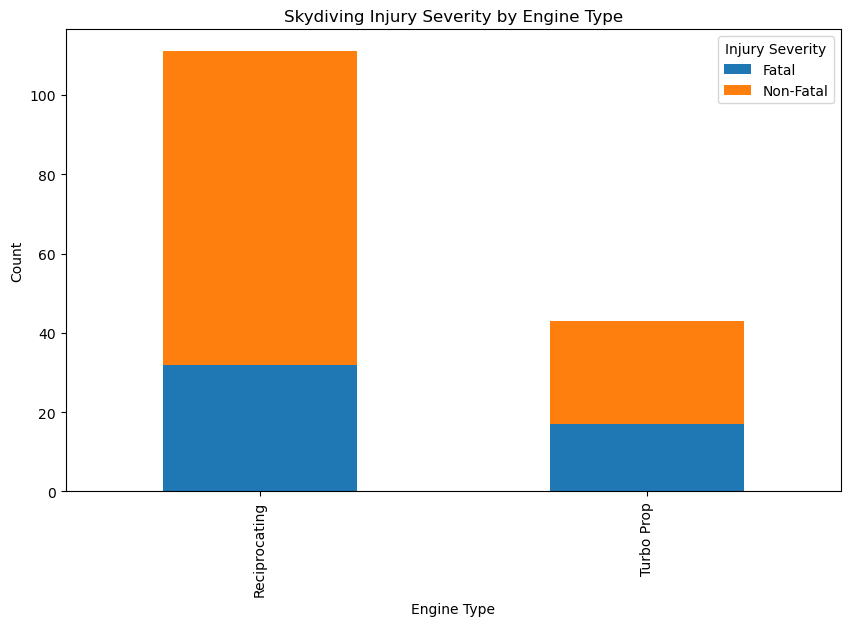

Reciprocating Engines have a 28.8% fatality rate, and Turboprop engines have a 39.5% fatality rate


In [128]:
engine_fatality_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.title('Skydiving Injury Severity by Engine Type')
plt.legend(title='Injury Severity')
plt.show()
print("Reciprocating Engines have a 28.8% fatality rate, and Turboprop engines have a 39.5% fatality rate")

<BarContainer object of 10 artists>

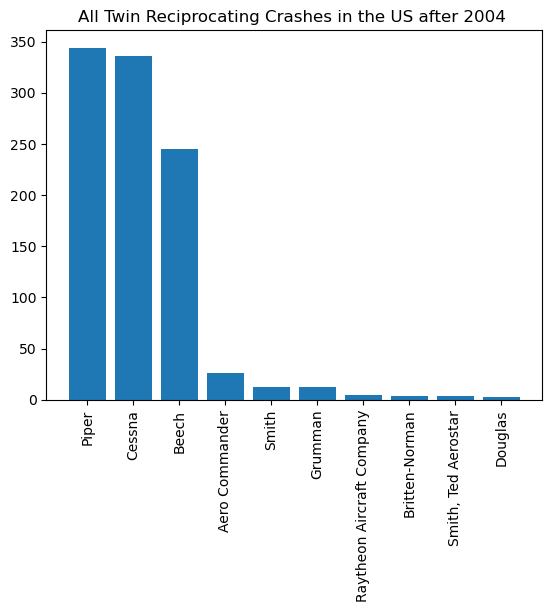

In [129]:
sky_rec = engine_df[engine_df["Number Of Engines"] == "2"]
sky_rec = sky_rec[sky_rec["Country"] == "United States"]
sky_rec = sky_rec[sky_rec["Engine Type"] == "Reciprocating"]

sky_rec["Event Date"] = sky_rec["Event Date"].str.split("-").str.get(0).astype(int)
sky_rec = sky_rec[sky_rec["Event Date"] >= 2004]
makes = sky_rec["Make"].value_counts().index[:10]
counts= sky_rec["Make"].value_counts().values[:10]
plt.title("All Twin Reciprocating Crashes in the US after 2004 ")
plt.tick_params(axis='x', labelrotation=90)
plt.bar(makes,counts)

C:\Users\Greg\AppData\Local\Temp\ipykernel_37648\3285229582.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  damage_sky.drop(columns = "Purpose Of Flight", inplace = True)
C:\Users\Greg\AppData\Local\Temp\ipykernel_37648\3285229582.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  damage_all.drop(columns = "Purpose Of Flight", inplace = True)


Aircraft Damage
Substantial    112
Destroyed       32
Minor            8
Name: count, dtype: int64

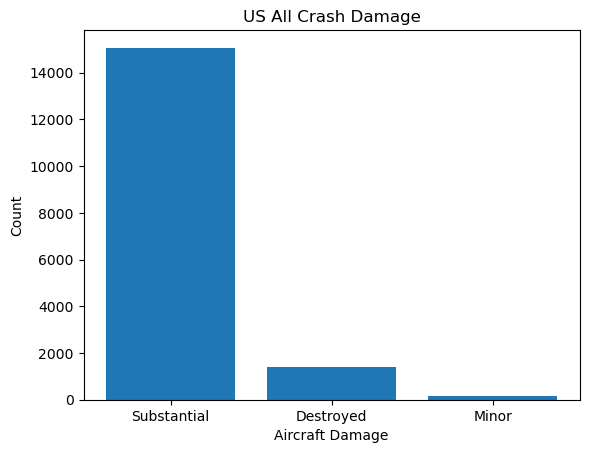

In [130]:
damage = df[["Aircraft Damage","Purpose Of Flight","Country"]].dropna(axis = 0)
damage = damage[damage[["Aircraft Damage","Purpose Of Flight", "Country"]] != "Unknown"]
damage = damage[damage["Country"] == "United States"]
damage_all = damage[damage["Purpose Of Flight"] != "Skydiving"]
damage_sky = damage[damage["Purpose Of Flight"] == "Skydiving"]
damage_sky.drop(columns = "Purpose Of Flight", inplace = True)
damage_all.drop(columns = "Purpose Of Flight", inplace = True)

plt.bar(damage_all["Aircraft Damage"].value_counts().index,damage_all["Aircraft Damage"].value_counts().values)
plt.xlabel("Aircraft Damage")
plt.ylabel("Count")
plt.title("US All Crash Damage")
damage_sky["Aircraft Damage"].value_counts()